In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df['Gender'] = df['Gender'].replace({'Male': 1 , 'Female': 0})

In [5]:
sc = StandardScaler()
df[['income', 'score']] = sc.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income,score
0,1,1,19,15,39,-1.738999,-0.434801
1,2,1,21,15,81,-1.738999,1.195704
2,3,0,20,16,6,-1.700830,-1.715913
3,4,0,23,16,77,-1.700830,1.040418
4,5,0,31,17,40,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,196,0,35,120,79,2.268791,1.118061
196,197,0,45,126,28,2.497807,-0.861839
197,198,1,32,126,74,2.497807,0.923953
198,199,1,32,137,18,2.917671,-1.250054


In [7]:
def optimize(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize= (10,10))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("No. of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

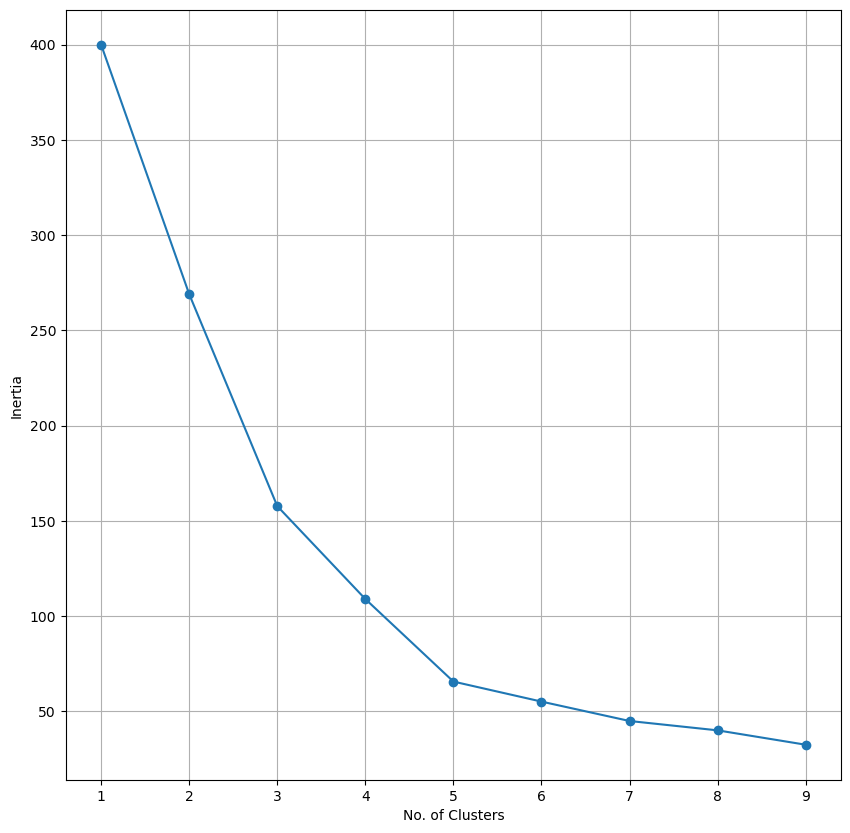

In [8]:
optimize(df[['income', 'score']], 10)

In [9]:
kmeans = KMeans(n_clusters=5)

In [10]:
kmeans.fit(df[['income', 'score']])

C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bobbo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [11]:
df['clusters_5'] = kmeans.labels_
pred = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income,score,clusters_5
0,1,1,19,15,39,-1.738999,-0.434801,4
1,2,1,21,15,81,-1.738999,1.195704,0
2,3,0,20,16,6,-1.700830,-1.715913,4
3,4,0,23,16,77,-1.700830,1.040418,0
4,5,0,31,17,40,-1.662660,-0.395980,4
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,2.268791,1.118061,2
196,197,0,45,126,28,2.497807,-0.861839,1
197,198,1,32,126,74,2.497807,0.923953,2
198,199,1,32,137,18,2.917671,-1.250054,1


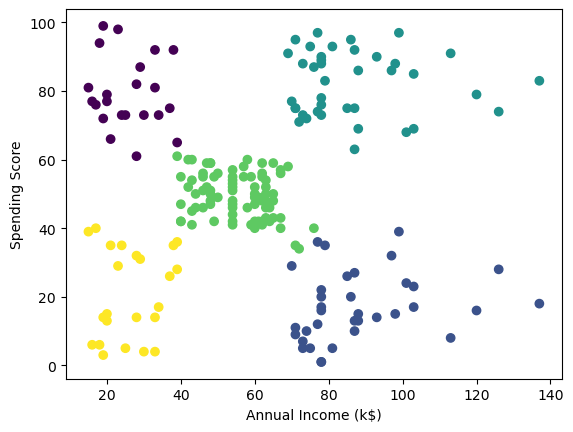

In [12]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df['clusters_5'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()